In [25]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
from torch import nn
import torch.nn.functional as F

import helper

import matplotlib.pyplot as plt

In [26]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [41]:
model1= nn.Sequential(nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                   )
#Define loss
criterion = nn.CrossEntropyLoss()

images,labels = next(iter(trainloader))

#Flatten the image
images = images.view(images.shape[0],-1)

#fprward pass our network and get logits
logits = model1(images)

#calculate the loss
loss = criterion(logits,labels)
print(logits.shape)
print("---------------")
print(labels.shape)
print(loss)

torch.Size([64, 10])
---------------
torch.Size([64])
tensor(2.2990, grad_fn=<NllLossBackward>)


In [43]:
model = nn.Sequential(nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1))
#Define loss
criterion = nn.NLLLoss()

images,labels = next(iter(trainloader))

#Flatten the image
images = images.view(images.shape[0],-1)

#fprward pass our network and get logits
logits = model(images)

#calculate the loss
loss = criterion(logits,labels)
print(logits.shape)
print("---------------")
print(labels.shape)
print(loss)

torch.Size([64, 10])
---------------
torch.Size([64])
tensor(2.3071, grad_fn=<NllLossBackward>)


# AutoGrad

In [76]:
x= torch.zeros(1,requires_grad=True)
print(x)


tensor([0.], requires_grad=True)


In [96]:
x= torch.randn(2,2)
x.requires_grad_(True)

tensor([[ 0.7348, -1.1828],
        [ 0.3955, -1.0624]], requires_grad=True)

In [97]:
y= x**2

print(y)
print(y.grad_fn)

tensor([[0.5399, 1.3990],
        [0.1564, 1.1288]], grad_fn=<PowBackward0>)


In [98]:
z = y.mean()
print(z)

tensor(0.8060, grad_fn=<MeanBackward0>)


In [99]:
print(x.grad)

None


In [100]:
z.backward()
print(x.grad)
print(x/2)


tensor([[ 0.3674, -0.5914],
        [ 0.1978, -0.5312]])
tensor([[ 0.3674, -0.5914],
        [ 0.1978, -0.5312]], grad_fn=<DivBackward0>)


In [107]:
model = nn.Sequential(nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1))
#Define loss
criterion = nn.NLLLoss()

images,labels = next(iter(trainloader))

#Flatten the image
images = images.view(images.shape[0],-1)

#fprward pass our network and get logits
logits = model(images)

#calculate the loss
loss = criterion(logits,labels)
print(logits.shape)
print("---------------")
print(labels.shape)
print(loss)

print ('Before Backward pass\n',model[0].weight.grad)
loss.backward()
print('After backward pass\n',model[0].weight.grad)

torch.Size([64, 10])
---------------
torch.Size([64])
tensor(2.2726, grad_fn=<NllLossBackward>)
Before Backward pass
 None
After backward pass
 tensor([[-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [-0.0035, -0.0035, -0.0035,  ..., -0.0035, -0.0035, -0.0035],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0049,  0.0049,  0.0049,  ...,  0.0049,  0.0049,  0.0049],
        [ 0.0044,  0.0044,  0.0044,  ...,  0.0044,  0.0044,  0.0044]])


In [119]:
from torch import optim
optimizer = optim.SGD(model.parameters(),lr=0.01)
print ('Initial weights-\n',model[0].weight)
images,labels = next(iter(trainloader))

#Flatten the image
images = images.view(images.shape[0],-1)
optimizer.zero_grad()
logits = model(images)

#calculate the loss
loss = criterion(logits,labels)
loss.backward()
print('gradient-\n',model[0].weight.grad)
optimizer.step()
print('Update weights-\n',model[0].weight)

Initial weights-
 Parameter containing:
tensor([[ 0.0273, -0.0140, -0.0253,  ..., -0.0129, -0.0178, -0.0237],
        [-0.0006,  0.0055,  0.0041,  ..., -0.0134,  0.0280,  0.0235],
        [ 0.0081,  0.0079,  0.0311,  ..., -0.0006,  0.0197, -0.0081],
        ...,
        [-0.0025,  0.0126, -0.0077,  ...,  0.0266,  0.0281,  0.0350],
        [ 0.0258,  0.0084,  0.0082,  ...,  0.0332,  0.0084,  0.0015],
        [-0.0131, -0.0152,  0.0336,  ..., -0.0264,  0.0239, -0.0336]],
       requires_grad=True)
gradient-
 tensor([[ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0011, -0.0011, -0.0011,  ..., -0.0011, -0.0011, -0.0011],
        [ 0.0023,  0.0023,  0.0023,  ...,  0.0023,  0.0023,  0.0023]])
Update weights-
 Parameter containing:
tensor([[ 0.027

In [153]:
model = nn.Sequential(nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr= 0.002)

epoch=7
print(model[0].weight)
for i in range(epoch):
    running_loss=0
    for images,labels in trainloader:
        images = images.view(images.shape[0],-1)
        optimizer.zero_grad()
        logos = model(images)
        loss = criterion(logos,labels)
     
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    print(running_loss/len(trainloader))
print(model[0].weight)    

Parameter containing:
tensor([[ 0.0267,  0.0156, -0.0125,  ...,  0.0058,  0.0139, -0.0342],
        [ 0.0009, -0.0074,  0.0087,  ..., -0.0018,  0.0315,  0.0125],
        [ 0.0121, -0.0032, -0.0215,  ...,  0.0004, -0.0216, -0.0222],
        ...,
        [-0.0037, -0.0021,  0.0111,  ...,  0.0254, -0.0273,  0.0332],
        [ 0.0143,  0.0031,  0.0059,  ...,  0.0142,  0.0174, -0.0081],
        [-0.0004,  0.0068,  0.0064,  ..., -0.0092,  0.0100,  0.0250]],
       requires_grad=True)
2.0717034835551087
1.2614632088746598
0.7331522001322907
0.5515544104105883
0.4669113144246754
0.4190296429211397
0.38923701950545503
Parameter containing:
tensor([[ 0.0228,  0.0116, -0.0164,  ...,  0.0018,  0.0100, -0.0381],
        [-0.0035, -0.0117,  0.0043,  ..., -0.0062,  0.0272,  0.0081],
        [ 0.0123, -0.0030, -0.0213,  ...,  0.0006, -0.0214, -0.0220],
        ...,
        [-0.0092, -0.0076,  0.0056,  ...,  0.0199, -0.0328,  0.0277],
        [ 0.0147,  0.0035,  0.0063,  ...,  0.0147,  0.0179, -0.0076]

Parameter containing:
tensor([[-0.0192,  0.0177,  0.0339,  ...,  0.0191,  0.0213,  0.0068],
        [ 0.0341, -0.0254,  0.0227,  ..., -0.0350, -0.0312,  0.0108],
        [-0.0043,  0.0315,  0.0096,  ..., -0.0233, -0.0128,  0.0182],
        ...,
        [-0.0276, -0.0172, -0.0311,  ...,  0.0183,  0.0295,  0.0157],
        [ 0.0062,  0.0275,  0.0075,  ...,  0.0251, -0.0359,  0.0232],
        [-0.0106, -0.0073, -0.0297,  ...,  0.0276,  0.0198,  0.0044]],
       requires_grad=True)


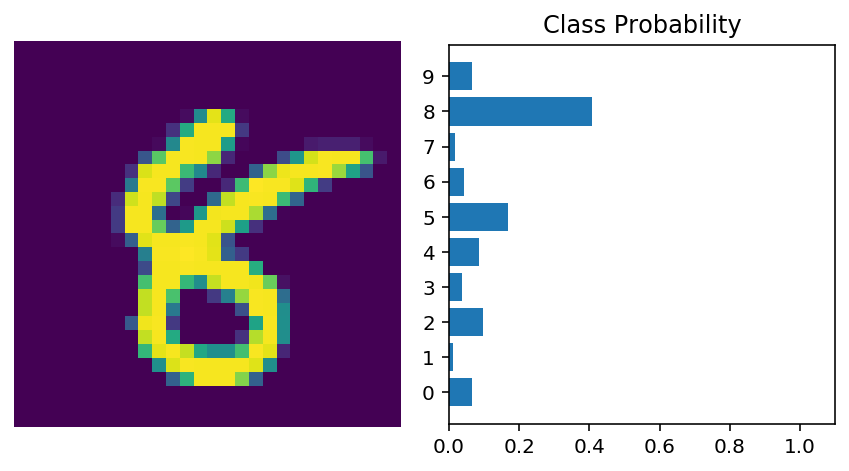

In [149]:
%matplotlib inline
import helper
img = images[8].view(1,784)
with torch.no_grad():
    logos=model(img)
ps = torch.exp(logos)
helper.view_classify(img.view(1,28,28),ps)
print(model[0].weight)